# Mini-Batch Gradient Descent

In this quiz, you'll be given the following sample dataset (as in [`data.csv`](data.csv)), and your goal is to write a function that executes Mini-Batch Gradient Descent to find a best-fitting regression line. You might consider looking into NumPy's `matmul` function for this!

![Mini-Batch Gradient Descent Dataset](data.png)

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [3]:
# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.

    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """

    # Fill in code
    y_hat = np.matmul(X, W) + b
    err = y - y_hat

    W_new = W + learn_rate * np.matmul(err, X)
    b_new = b + learn_rate * err.sum()
    
    return W_new, b_new

In [4]:
# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # Coefficients
    b = 0 # Intercept
    
    # Run iterations
    regression_coef = [np.hstack((W, b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch, :]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

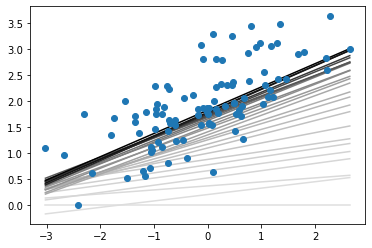

In [5]:
data = np.loadtxt('data.csv', delimiter = ',')
X = data[:, :-1]
y = data[:, -1]

regression_coef = miniBatchGD(X, y)

# Plot the results
plt.figure()
X_min = X.min()
X_max = X.max()

counter = len(regression_coef)

for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max], [X_min * W + b, X_max * W + b], color = color)

plt.scatter(X, y, zorder = 3)
plt.show()

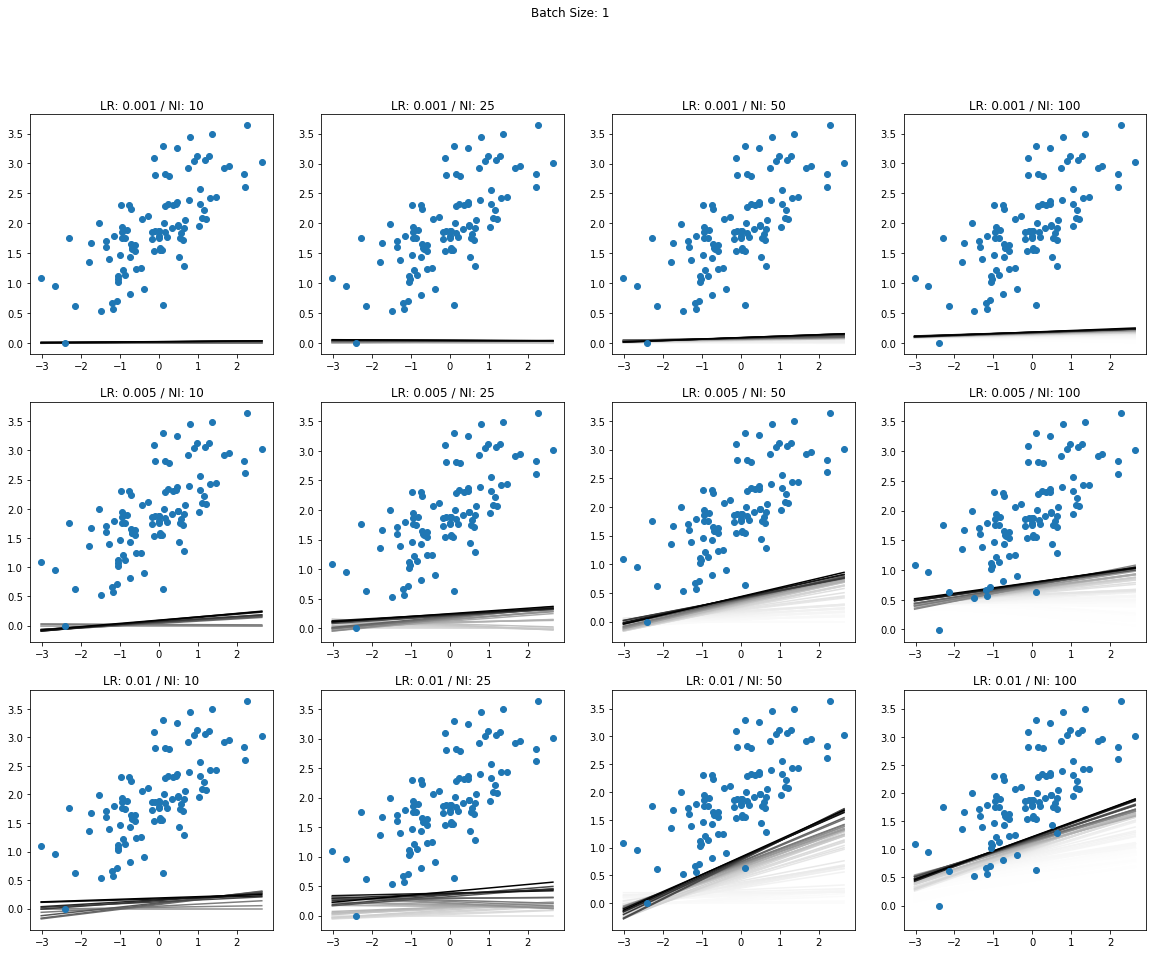

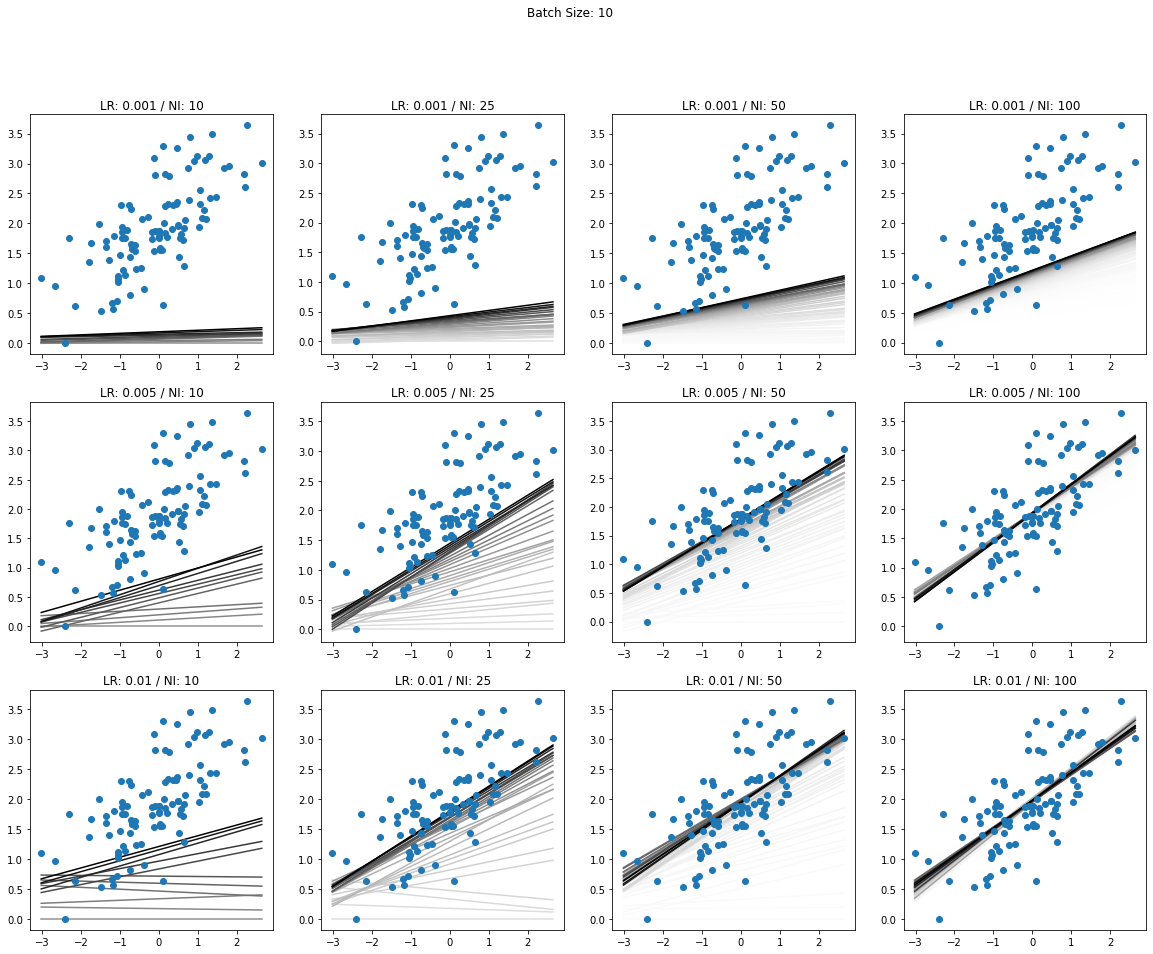

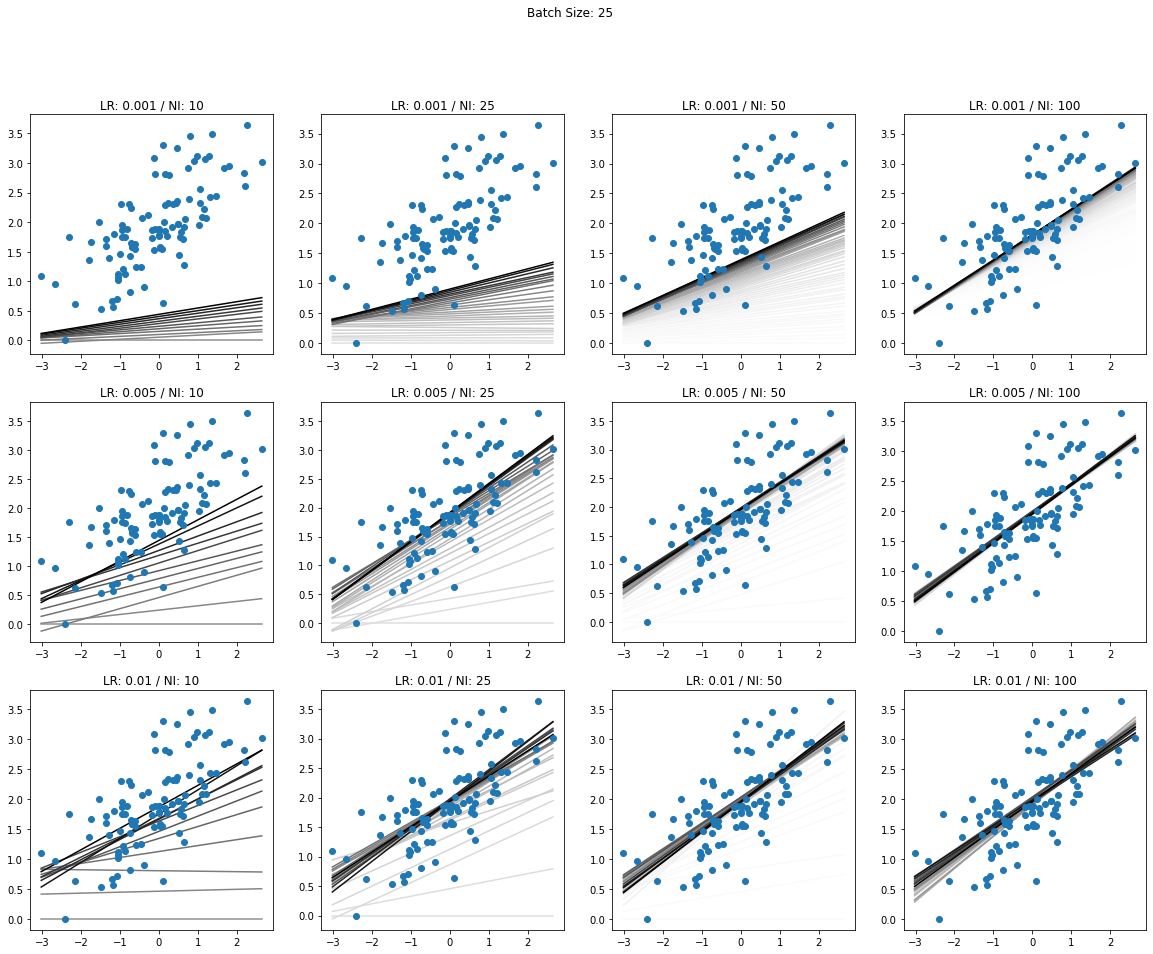

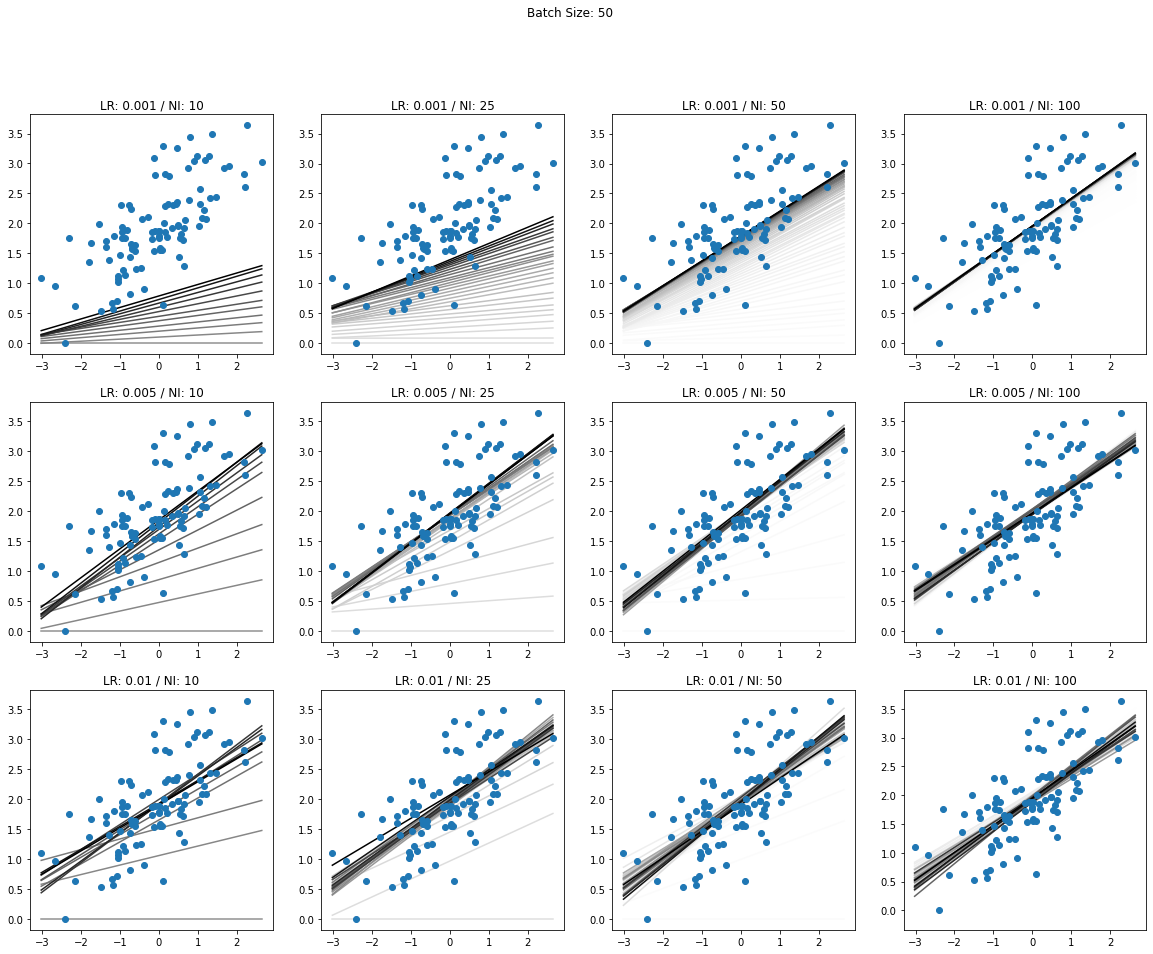

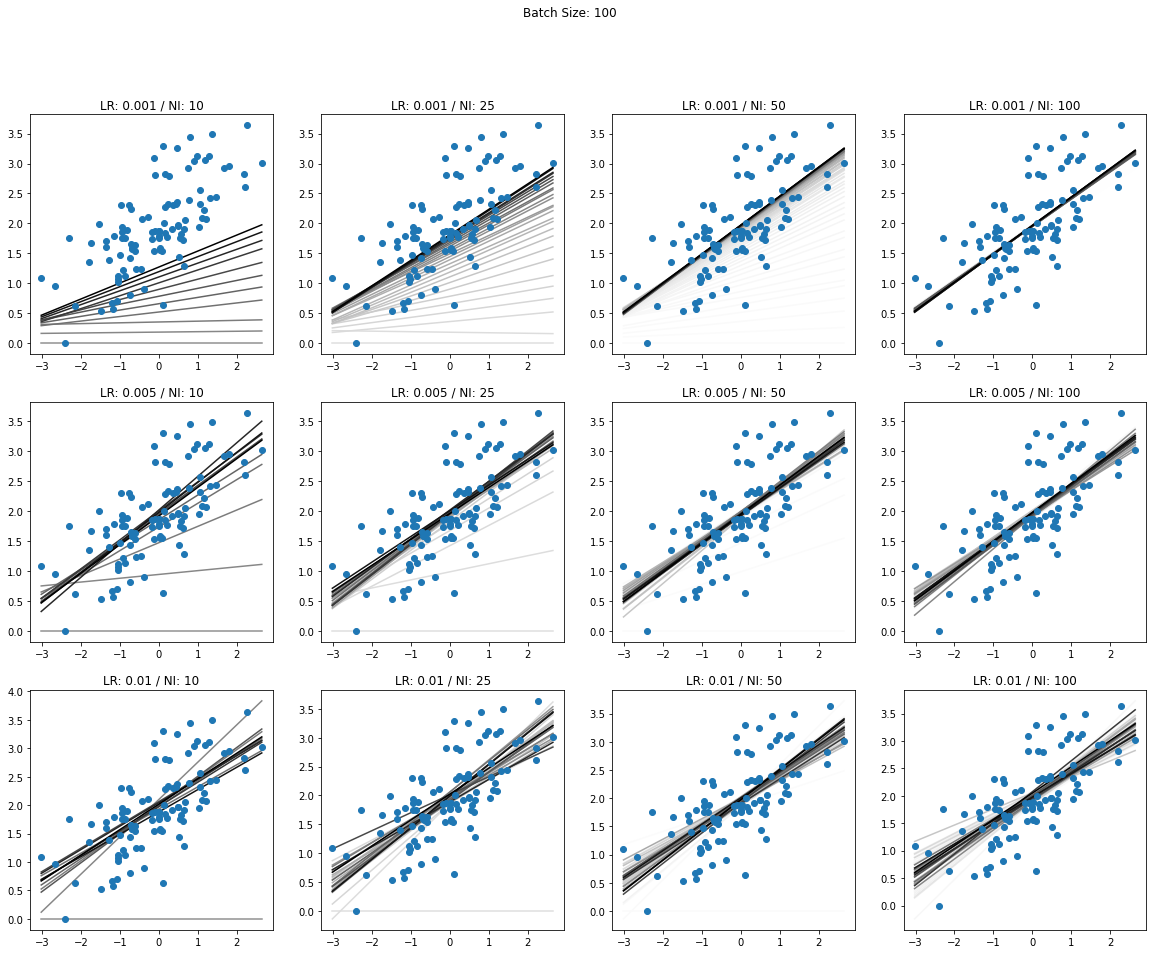

In [6]:
# This cell wasn't part of the original quiz. I added it in order to test
# different values of batch sizes, iterations and learning rates.

# Batch sizes 1 and 100 are the same as Stochastic and Batch, respectively.
batch_sizes = [1, 10, 25, 50, 100]
learn_rates = [0.001, 0.005, 0.01]
num_iters   = [10, 25, 50, 100]

for batch_size in batch_sizes:
    i = 0

    plt.figure(figsize = [20, 15])
    plt.suptitle(f'Batch Size: {batch_size}')

    for learn_rate in learn_rates:
        j = 0

        for num_iter in num_iters:
            regression_coef = miniBatchGD(X, y, batch_size = batch_size, learn_rate = learn_rate, num_iter = num_iter)

            # Plot the results
            plt.subplot(len(learn_rates), len(num_iters), ((i + 1) * 4 + (j - 3)))
            plt.title(f'LR: {learn_rate} / NI: {num_iter}')

            X_min = X.min()
            X_max = X.max()

            counter = len(regression_coef)

            for W, b in regression_coef:
                counter -= 1
                color = [1 - 0.92 ** counter for _ in range(3)]
                plt.plot([X_min, X_max], [X_min * W + b, X_max * W + b], color = color)

            plt.scatter(X, y, zorder = 3)

            j = j + 1
        i = i + 1